In [41]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [42]:
arquivo = pd.read_csv('linkedin_datascience_jobs.csv')

In [43]:
df = pd.DataFrame(arquivo)
df

,title,company,location,posted,description,applicants,work_mode,link
0,Consultor Performance Negócios (Cientista / Da...,SulAmérica,"São Paulo, SP",Há 4 dias,DescriçãoResponsável por centralizar todos os ...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
1,Cientista de Dados Senior,CSU Digital,"Barueri, SP",Há 1 mês,O profissional irá trabalhar com um time multi...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
2,Data Scientist | Marketing Analytics,DP6,"São Paulo, SP",Há 6 dias,Nós somos a DP6!Otimizamos a eficiência do Mar...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
3,Banco de Talentos - Profissionais com Deficiência,Cognizant,São Paulo e Região,Há 5 dias,A Cognizant está sempre à procura de grandes t...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
4,Gestor de Tráfego Sênior,V4 Company,"São Paulo, SP",Há 4 dias,🚀 Faça parte da maior unidade da Rede V4 Compa...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
5,Cientista de Dados Jr. - TI - Data & Analytics...,Alares Internet,"São Paulo, SP",Há 1 mês,"Você é curioso(a), apaixonado(a) por dados e q...",NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
6,Cientista de Dados JR,Mitsui Sumitomo Seguros,"São Paulo, SP",Há 3 semanas,DESCRIÇÃOPrincipais AtividadesApoiar na extraç...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
7,Cientista de Dados - Júnior,IBM,"São Paulo, SP",Há 2 semanas,IntroductionIn this role you will join IBM Con...,NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
8,Cientista de Dados JR,Mitsui Sumitomo Seguros,São Paulo e Região,Há 3 semanas,"Principais AtividadesApoiar na extração, trata...",NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...
9,Pessoa Cientista de Dados - Vaga afirmativa pa...,Artefact,"São Paulo, SP",Há 6 horas,"A abertura atual é para a Artefact do Brasil, ...",NaN,On-site/Hybrid,https://www.linkedin.com/jobs-guest/jobs/api/j...


In [44]:
def extrair_senioridade(texto):
    texto = texto.lower()
    if "sênior" in texto or "senior" in texto:
        return "Sênior"
    elif "pleno" in texto:
        return "Pleno"
    elif "júnior" in texto or "junior" in texto:
        return "Júnior"
    elif "estagiario" in texto or "estagiário" in texto:
        return "Estagiário"
    else:
        return "Não especificado"

In [45]:
df["titulo_descr"] = df["title"].fillna("") + " " + df["description"].fillna("")

In [46]:
df["senioridade"] = df["titulo_descr"].apply(extrair_senioridade)

In [47]:
print(df["senioridade"].value_counts())

senioridade
Não especificado    19
Sênior              12
Pleno                7
Júnior               2
Name: count, dtype: int64


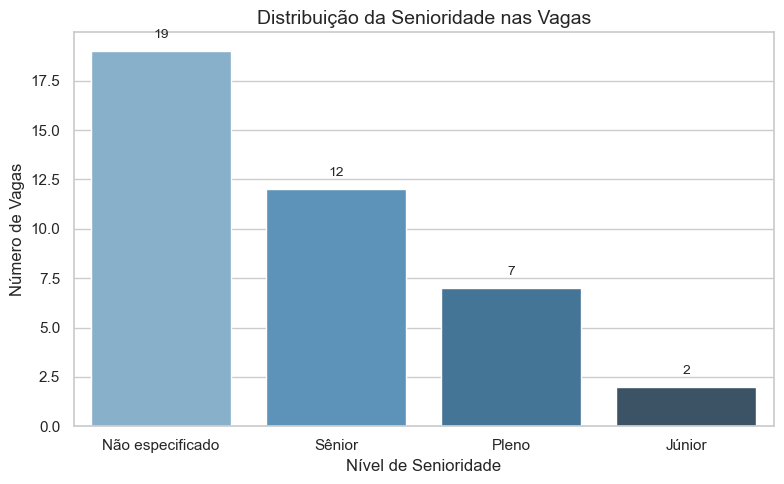

In [48]:
# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico de barras
sns.countplot(x="senioridade", data=df, order=df["senioridade"].value_counts().index, palette="Blues_d")

# Título e rótulos
plt.title("Distribuição da Senioridade nas Vagas", fontsize=14)
plt.xlabel("Nível de Senioridade")
plt.ylabel("Número de Vagas")

# Exibir valores em cima das barras
for i, count in enumerate(df["senioridade"].value_counts()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [49]:
def extrair_idioma(texto):
    texto = texto.lower()
    if "ingles" in texto or "inglês" in texto:
        return "Inglês"
    elif "espanhol" in texto:
        return "Espanhol"
    else:
        return "Não especificado"

In [50]:
df["idioma"] = df["description"].apply(extrair_idioma)

In [51]:
print(df["idioma"].value_counts())

idioma
Não especificado    24
Inglês              16
Name: count, dtype: int64


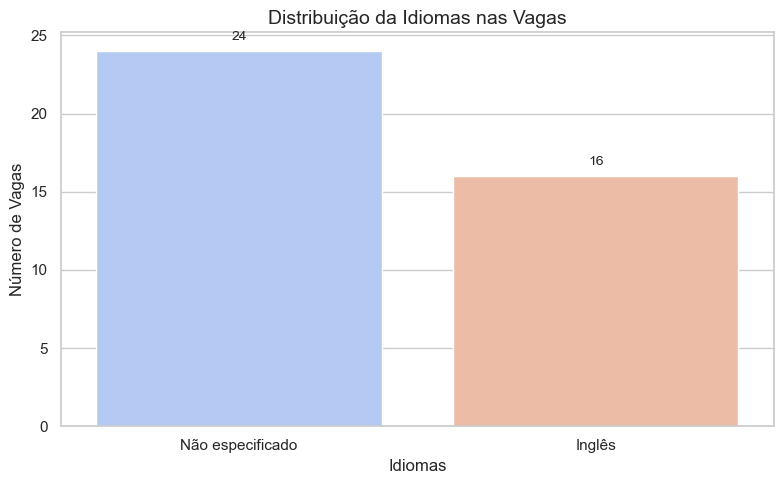

In [52]:
# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico de barras
sns.countplot(x="idioma", data=df, order=df["idioma"].value_counts().index, palette="coolwarm")

# Título e rótulos
plt.title("Distribuição da Idiomas nas Vagas", fontsize=14)
plt.xlabel("Idiomas")
plt.ylabel("Número de Vagas")

# Exibir valores em cima das barras
for i, count in enumerate(df["idioma"].value_counts()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [53]:
def extrair_certificado(texto):
    texto = texto.lower()
    if "azure" in texto:
        return "Microsoft Azure"
    elif "aws" in texto:
        return "Amazon Web Service"
    elif "google" in texto or "gcp" in texto:
        return "Google Cloud"
    else:
        return "Não especificado"

In [54]:
df["certificado"] = df["description"].apply(extrair_certificado)
print(df["certificado"].value_counts())

certificado
Não especificado      23
Google Cloud           9
Microsoft Azure        6
Amazon Web Service     2
Name: count, dtype: int64


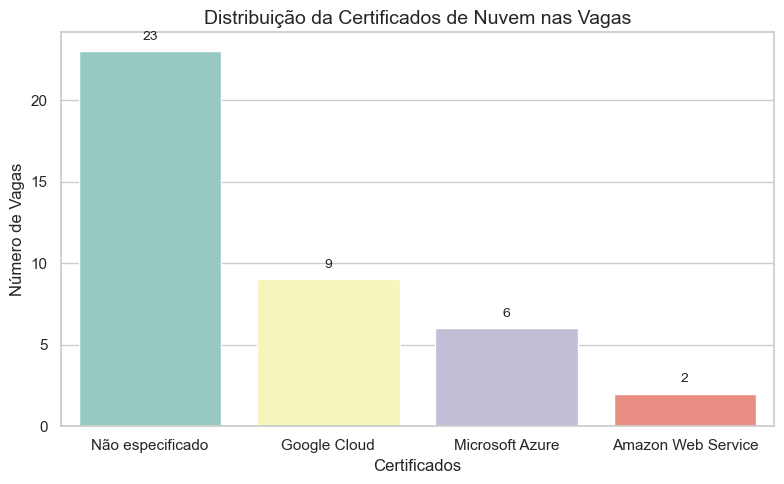

In [56]:
# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Gráfico de barras
sns.countplot(x="certificado", data=df, order=df["certificado"].value_counts().index, palette="Set3")

# Título e rótulos
plt.title("Distribuição da Certificados de Nuvem nas Vagas", fontsize=14)
plt.xlabel("Certificados")
plt.ylabel("Número de Vagas")

# Exibir valores em cima das barras
for i, count in enumerate(df["certificado"].value_counts()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()